In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("deep", desat=.65)

In [25]:
def poisson_pmf(x , mu):
    return np.exp(-mu) * mu**x / np.math.factorial(x)


# P(K = k) = 3 / (pi^2 * k^2)
def random_pmf(k):
    return 3 / (np.square(np.pi) * np.square(k))

In [26]:
def poisson_cdf(x, mu):
    prob = np.zeros(x+1)
    for i in range(0, x+1):
        prob[i] = poisson_pmf(i, 10)
    return np.cumsum(prob)[-1]

def random_cdf(k):
    prob = np.zeros(k+1)
    for i in range(0, k+1):
        prob[i] = random_pmf(i)
    return np.cumsum(prob)[-1]

In [54]:
def poisson_inv_cdf(p, mu):
    low = 0.0
    high = 0.0
    for x in range(1, 20):
        s = poisson_pmf(x, mu)
        high += s
        if p>=low and p<=high:
            return x
        low += s
    return np.random.randint(100)


def random_inv_cdf(p):
    low = 0.0
    high = 0.0
    for x in range(1, 20):
        s = random_pmf(x)
        high += s
        if p>0.5:
            p = p - 0.5
            if p>=low and p<=high:
                return x
            low += s
        else:
            if p>=low and p<=high:
                return (-1 * x)
            low += s
    return np.random.randint(100)

In [42]:
def generate_poisson_samples(no_of_samples):
    X = []
    U = np.random.uniform(0, 1, no_of_samples)
    for u in U:
        X.append(poisson_inv_cdf(u, 10))
    return X

def generate_randomDist_samples(no_of_samples):
    X = []
    U = np.random.uniform(0, 1, no_of_samples)
    for u in U:
        X.append(random_inv_cdf(u))
    return X

# def generate_randomDist_samples(no_of_samples):
#     X = []
#     U = np.random.uniform(0, 1, no_of_samples)
#     for u in U:
#         if u < 0.5:
#             X.append(random_inv_cdf(u) * -1)
#         X.append(random_inv_cdf(u))
#     return X

In [18]:
# sample_mean = []
# no_of_times = 1000
# no_of_samples = 5
# for i in range(no_of_times):
#     sample_mean.append(np.mean(generate_poisson_samples(no_of_samples)))

# mu = np.mean(sample_mean)
# var = np.var(sample_mean)
# bins = np.linspace(0, 15, 100)
# plt.hist(sample_mean, bins, color = 'cyan', alpha=0.5)
# plt.xlabel('Observations')
# plt.ylabel('Frequency')
# plt.title('Histogram for sample_size = %d' %  (no_of_samples))
# plt.text(0, 50, r'$\mu=%f,\ \sigma=%f$' % (mu, var))
# plt.grid(True)
# plt.show()

In [19]:
# for i in range(10):

#     sample_mean = []
#     no_of_times = 1000
#     no_of_samples = 5
#     for i in range(no_of_times):
#         sample_mean.append(np.mean(generate_randomDist_samples(no_of_samples)))

#     mu = np.mean(sample_mean)
#     var = np.var(sample_mean)
#     bins = np.linspace(0, 20, 100)
#     plt.hist(sample_mean, bins, color = 'cyan', alpha=0.5)
#     plt.xlabel('Observations')
#     plt.ylabel('Frequency')
#     plt.title('Histogram for sample_size = %d' %  (no_of_samples))
#     plt.text(0, 5, r'$\mu=%f,\ \sigma=%f$' % (mu, var))
#     plt.grid(True)
#     plt.show()

In [51]:
# [9.99, 10.01]
# [9.9, 10.1]

def experiment(no_of_times, no_of_samples, distribution):
    sample_mean = []
    counter1 = 0
    counter2 = 0
    confidence_interval_1 = [9.99, 10.01]
    confidence_interval_2 = [9.8, 10.1]
    
    
    if distribution == 'Poisson' or distribution == 'poisson':
        for i in range(no_of_times):
            sample_mean.append(np.mean(generate_poisson_samples(no_of_samples)))
    elif distribution == 'Nitesh' or distribution == 'nitesh':
        for i in range(no_of_times):
            sample_mean.append(np.mean(generate_randomDist_samples(no_of_samples)))
    
    mu = np.mean(sample_mean)
    std = np.std(sample_mean)
    
    for each in sample_mean:
        if each >= confidence_interval_1[0] and each <= confidence_interval_1[1]:
            counter1 += 1
        if each >= confidence_interval_2[0] and each <= confidence_interval_2[1]:
            counter2 += 1
    
    if distribution == 'Poisson' or distribution == 'poisson':
        plt.text(12, 90, r'$\mu=%f,\ \sigma=%f$' % (mu, std))
        #bins = np.linspace(6, 15, 100)
    elif distribution == 'Nitesh' or distribution == 'nitesh':
        plt.text(0, 5, r'$\mu=%f,\ \sigma=%f$' % (mu, std))
        #bins = np.linspace(0, 15, 100)
    #plt.hist(sample_mean, bins, color = 'cyan', alpha=0.5)
    plt.hist(sample_mean, alpha=0.5)
    plt.xlabel('Observations')
    plt.ylabel('Frequency')
    plt.title('Histogram for sample_size = %d' %  (no_of_samples))
    plt.grid(True)
    plt.show()
    
    return (mu, std, counter1, counter2)

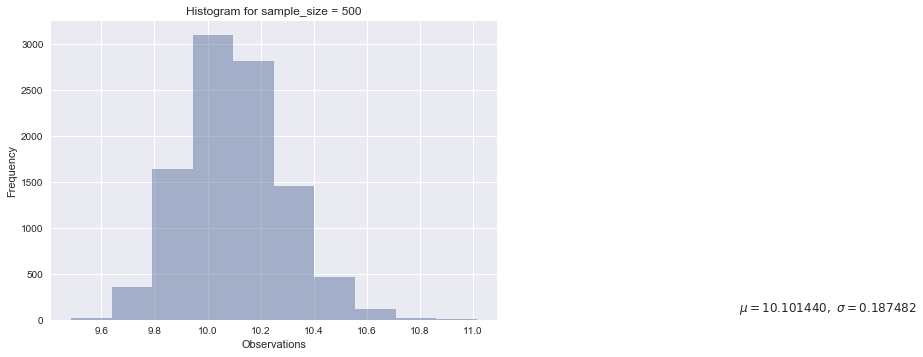

Confidence Interval for N = 500 is [10.085007 , 10.117874]
Sample Mean lies in the interval [9.99, 10.01] 476 times for sample_size, N = 500
Sample Mean lies in the interval [9.9, 10.1] 4807 times for sample_size, N = 500


In [53]:
n_samples = 500
(mu, std, counter1, counter2) = experiment(10000, n_samples, 'Poisson')
upper_limit = mu + 1.96 * (std / np.sqrt(n_samples))
lower_limit = mu - 1.96 * (std / np.sqrt(n_samples))
print('Confidence Interval for N = %d is [%f , %f]' % (n_samples, lower_limit, upper_limit))
print('Sample Mean lies in the interval [9.99, 10.01] %d times for sample_size, N = %d' % (counter1, n_samples))
print('Sample Mean lies in the interval [9.9, 10.1] %d times for sample_size, N = %d' % (counter2, n_samples))